In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
from scipy import stats
from matplotlib.pyplot import figure


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
path = "../files/"


### Load the Dataset for Model Building

In [3]:
df = pd.read_csv(path + "merged.csv")
df.shape

(31788324, 39)

### Let's Cluster the Users in to different Bins


In [4]:
df.head(1)

,Unnamed: 0,customer_id,article_id,price,sales_channel_id,day,month,year,dayofweek,row_num,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,20,9,2018,3,0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [5]:
customer_intelligence_df = df.groupby("customer_id").agg(
    unique_items=('article_id', lambda x: len(set(x))), 
    unique_departments=('department_no', lambda x: len(set(x))), 
    preferred_sales_channel=('sales_channel_id', lambda x: stats.mode(x)[0][0]),
    preferred_week=('dayofweek', lambda x: stats.mode(x)[0][0]),
    age=('age',np.max),
    monetary_value=('price', np.sum))
customer_intelligence_df.to_csv(path + 'customer_intelligence.csv')
customer_intelligence_df

,unique_items,unique_departments,preferred_sales_channel,preferred_week,age,monetary_value
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,19,15,2,5,49.0,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,64,32,2,1,25.0,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,14,11,2,5,24.0,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,1,2,6,54.0,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,12,10,2,2,52.0,0.469695
...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,42,14,2,2,24.0,1.292356
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,79,32,2,0,21.0,1.807322
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,40,29,2,3,21.0,0.788932


### Let's do some Scatter Plots before clustering

In [6]:
sample_df = customer_intelligence_df.head(100)

#### Let's take a sample dataset and do some plots to understand the data relationships before we do clustering Data represented in the plot is a small sample for the orginal data set and just for understanding purposes. Scatter plot with 31 million points would look aesthetic.

<Figure size 432x288 with 0 Axes>

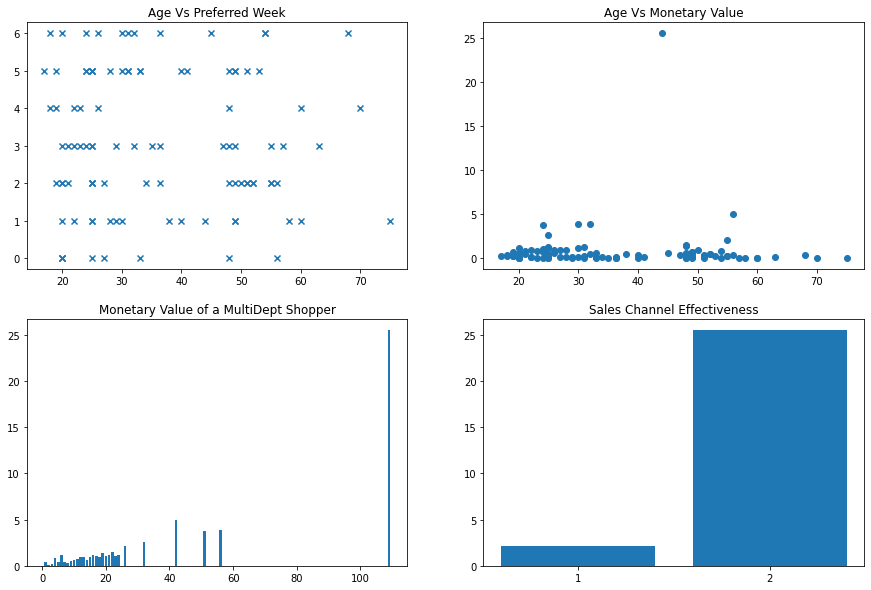

In [7]:
f = plt.figure()   
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = False)
f.set_size_inches(15,10)

one = axes[0][0].scatter(sample_df.age,sample_df['preferred_week'], marker = "x")
axes[0][0].set_title("Age Vs Preferred Week")

two = axes[0][1].scatter(sample_df.age,sample_df['monetary_value'], marker = "o")
axes[0][1].set_title("Age Vs Monetary Value")

axes[1][0].bar(sample_df.unique_departments, sample_df.monetary_value)
axes[1][0].set_title("Monetary Value of a MultiDept Shopper")

axes[1][1].bar(sample_df.preferred_sales_channel, sample_df.monetary_value)
axes[1][1].set_xticks([1,2])
axes[1][1].set_title("Sales Channel Effectiveness")

plt.show()


### Getting Started with K means clustering

In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


### Assuming 3 clusters for simplicity sake to begin with

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(customer_intelligence_df[['age','monetary_value']])
y_predicted

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [10]:
customer_intelligence_df['cluster']=y_predicted
customer_intelligence_df['cluster'].value_counts()


0    723209
2    323213
1    315859
Name: cluster, dtype: int64

In [11]:
km.cluster_centers_

array([[24.89735471,  0.65885907],
       [57.22325468,  0.61546735],
       [41.7710765 ,  0.66133559]])

### Now the question Is 3 clusters the right choice?<br/>
Let's try experimenting with more clustering before coming to a conclusion

In [12]:
kmeans_inert = []
cluster_range = range(1,10)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km.fit(customer_intelligence_df[['age','monetary_value']])
    kmeans_inert.append(km.inertia_)


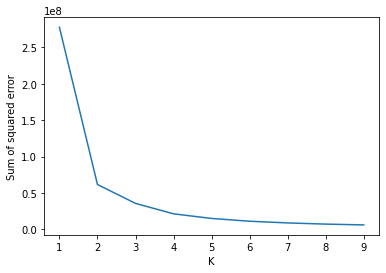

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(cluster_range,kmeans_inert)

In [14]:
km = KMeans(n_clusters=4)
# Cluster Predictions Based on new number of clusters
y_predicted = km.fit_predict(customer_intelligence_df[['age','monetary_value']])
customer_intelligence_df['cluster']=y_predicted
customer_intelligence_df['cluster'].value_counts()

0    554735
1    346773
2    321845
3    138928
Name: cluster, dtype: int64

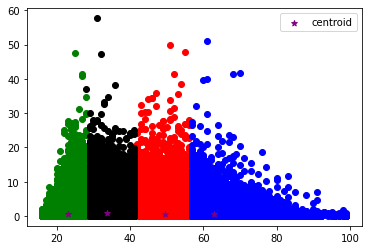

In [15]:
df1 = customer_intelligence_df[customer_intelligence_df.cluster==0]
df2 = customer_intelligence_df[customer_intelligence_df.cluster==1]
df3 = customer_intelligence_df[customer_intelligence_df.cluster==2]
df4 = customer_intelligence_df[customer_intelligence_df.cluster==3]
plt.scatter(df1.age,df1.monetary_value,color='green')
plt.scatter(df2.age,df2.monetary_value,color='red')
plt.scatter(df3.age,df3.monetary_value,color='black')
plt.scatter(df4.age,df4.monetary_value,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


### Persist the Customer Cluster Data to a csv file

In [16]:
customer_intelligence_df.to_csv(path + 'customer_intelligence.csv')

### Looks like number of optimum clusters based on the elbow graph is 4